In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline

# Step-1: Gathering Dataset

In [ ]:
(xtrain,ytrain), (xtest,ytest) =datasets.cifar10.load_data()

In [ ]:
xtrain.shape

In [ ]:
xtest.shape

In [ ]:
xtrain[0]

In [ ]:
ytrain.shape

In [ ]:
ytrain.ndim

In [ ]:
ytrain[:5] # here it is  2D array but need category

In [ ]:
ytrain=ytrain.reshape(-1,) # convert 2D to 1D | -1 refers 50000
ytrain[:5]

In [ ]:
ytrain.shape

In [ ]:
ytrain.ndim

In [ ]:
ytrain.shape

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[0]

In [ ]:
def plot_image(x,y ,index):
    plt.figure(figsize = (10,5))
    sns.set(style='white')
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [ ]:
plot_image(xtrain,ytrain, 0)

In [ ]:
plot_image(xtrain,ytrain, 7)

    | Normalizing the training data
Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
Xtrain = xtrain / 255.0
Xtest = xtest / 255.0

# Step-4: Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(xtrain, ytrain, epochs=1)

You can see that at the end of 5 epochs, accuracy is at around 49%

    | Note: 
when value of y is taken from One Hot encoding then use categorical_crossentropy, on the other hand y is taken as digit/value then it will be sparse_categorical_cross_entropy 

In [ ]:
ann.evaluate(xtest,ytest)

In [ ]:
y_pred = ann.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

    | classification report

In [ ]:
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(ytest, y_pred_classes))

# Step-5: Now let us build a convolutional neural network to train our images

In [37]:
cnn=models.Sequential([
        # cnn
        layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), # Convolutional layer | this layer detects the feature of the image
        layers.MaxPooling2D(2,2), #maxpooling layer | we can use singe or multipul layers

        # Another set of convolutional and maxpooling layer
        layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(2,2), 

        # dense 
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax')
])

In [42]:
cnn.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
)

In [43]:
cnn.fit(xtrain, ytrain, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 78s 49ms/step - loss: 2.1298 - accuracy: 0.2770
Epoch 2/3
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4692 - accuracy: 0.4587
Epoch 3/3
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2876 - accuracy: 0.5356


filters=32 refers the number of filter, this can detect 32 difference features or edges in the image

kernel_size=(3,3) specifies the size of a filter


In [44]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 5s 16ms/step - loss: 1.2423 - accuracy: 0.5606


[1.2422751188278198, 0.5605999827384949]

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
y_pred=cnn.predict(xtest) 
y_pred[:5]

In [53]:
np.argmax(y_pred[0])

3

In [74]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 8, 8, 8, 6]

In [75]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [76]:
ytest=ytest.reshape(-1,)
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [77]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [78]:
classes[y_pred_classes[4]]

'frog'

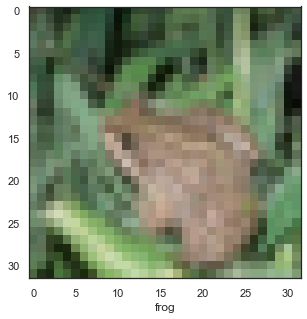

In [79]:
plot_image(xtest, ytest,4)

In [80]:
print("Classification Report: \n", classification_report(ytest, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.66      0.65      1000
           1       0.77      0.62      0.69      1000
           2       0.39      0.32      0.35      1000
           3       0.44      0.13      0.20      1000
           4       0.41      0.57      0.48      1000
           5       0.48      0.54      0.50      1000
           6       0.56      0.73      0.63      1000
           7       0.54      0.76      0.63      1000
           8       0.76      0.63      0.69      1000
           9       0.65      0.66      0.65      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.55     10000
weighted avg       0.56      0.56      0.55     10000

